In [1]:
import os
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-03-25 18:47:17,383 [pulse2percept] [INFO] Welcome to pulse2percept


In [67]:
subject = '52-001'
electrodes = ['A05']
amplitude = 2
frequency = 20
datafolder = os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape', subject)

In [73]:
X, y = p2pspatial.load_data(datafolder, subject=subject, electrodes=electrodes, date="20100121",
                            amplitude=amplitude, frequency=frequency, n_jobs=1)
X

,amp,date,electrode,filename,folder,freq,img_shape,param_str,stim_class,subject
0,2.0,20100121,A05,20100121_112209_trial3.bmp,/home/mbeyeler/data/secondsight/shape/52-001/2...,20.0,"(768, 1024)",52-001_SingleElectrode_f20_pw46_20100105.csv A...,SingleElectrode,52-001
1,2.0,20100121,A05,20100121_112209_trial14.bmp,/home/mbeyeler/data/secondsight/shape/52-001/2...,20.0,"(768, 1024)",52-001_SingleElectrode_f20_pw46_20100105.csv A...,SingleElectrode,52-001
2,2.0,20100121,A05,20100121_112209_trial21.bmp,/home/mbeyeler/data/secondsight/shape/52-001/2...,20.0,"(768, 1024)",52-001_SingleElectrode_f20_pw46_20100105.csv A...,SingleElectrode,52-001
3,2.0,20100121,A05,20100121_112209_trial33.bmp,/home/mbeyeler/data/secondsight/shape/52-001/2...,20.0,"(768, 1024)",52-001_SingleElectrode_f20_pw46_20100105.csv A...,SingleElectrode,52-001
4,2.0,20100121,A05,20100121_112209_trial50.bmp,/home/mbeyeler/data/secondsight/shape/52-001/2...,20.0,"(768, 1024)",52-001_SingleElectrode_f20_pw46_20100105.csv A...,SingleElectrode,52-001


In [74]:
cmap = plt.get_cmap('coolwarm')

(0.2298057, 0.298717966, 0.75368315299999999, 1.0)
(768, 1024, 3)
(0.48385432959999997, 0.62204984959999998, 0.97480820260000001, 1.0)
(768, 1024, 3)
(0.75361061799999995, 0.83023285099999999, 0.96087115700000003, 1.0)
(768, 1024, 3)
(0.94734540359999997, 0.79469550479999995, 0.71699050580000001, 1.0)
(768, 1024, 3)
(0.93183129659999997, 0.51908552320000001, 0.40647960859999999, 1.0)
(768, 1024, 3)
Saved as 52-001-A05-trials.eps


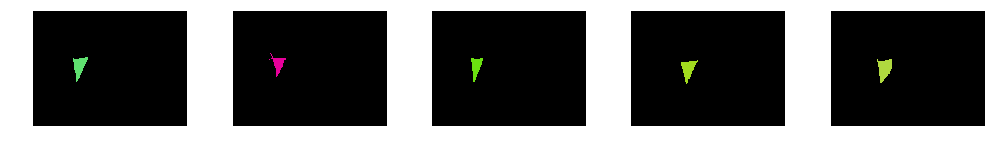

In [75]:
ncols = 5
nrows = int(np.ceil(np.sqrt(len(X) / ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
for i, ((_, row), ax) in enumerate(zip(y.iterrows(), axes.ravel())):
    color = cmap(i * 1.0 / len(X))
    print(color)
    img = np.concatenate((row['image'][:, :, np.newaxis] * color[0],
                          row['image'][:, :, np.newaxis] * color[1],
                          row['image'][:, :, np.newaxis] * color[2]),
                         axis=-1)
    print(img.shape)
    ax.imshow(img)
    ax.axis('off')
fig.tight_layout()
fname = '%s-%s-trials.eps' % (subject, electrodes[0])
fig.savefig(fname)
print("Saved as %s" % fname)

In [65]:
if len(X) > 0:
    Xmean, ymean = p2pspatial.transform_mean_images(X, y, threshold=False)

saves as 51-009-C01-mean.eps


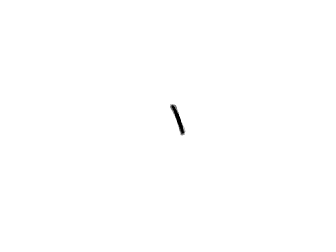

In [66]:
plt.imshow(255 - ymean.loc[0, 'image'], cmap='gray')
plt.axis('off')
fname = '%s-%s-mean.eps' % (subject, electrodes[0])
plt.savefig(fname)
print('saves as %s' % fname)